In [2]:
import numpy as np
import pandas as pd
import  xarray as xr
import  matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 打开数据
all_data = xr.open_dataset(r"D:\GithubRepository\Data_Github\hgt.mon.mean.nc")
hgt_time_slice = all_data["hgt"].sel(time=slice("1979-01-01T00:00:00.000000000","2019-01-01T00:00:00.000000000"))[::12]
hgt_level_time_slice = hgt_time_slice.sel(level = [500])

# Jan_Hgt = all_data["hgt"].sel(time=all_hgt["time"][::12])
# print(all_data.hgt.units)  # 查看单位  : m
# print(all_data["level"].attrs)  # 查看index 的单位:

# 计算数据 (二维)
Jan_Hgt_Mean = hgt_level_time_slice.mean(dim=["time","level"])


D:\myAnaconda_base\envs\geocat\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
D:\myAnaconda_base\envs\geocat\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
D:\myAnaconda_base\envs\geocat\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
D:\myAnaconda_base\envs\geocat\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


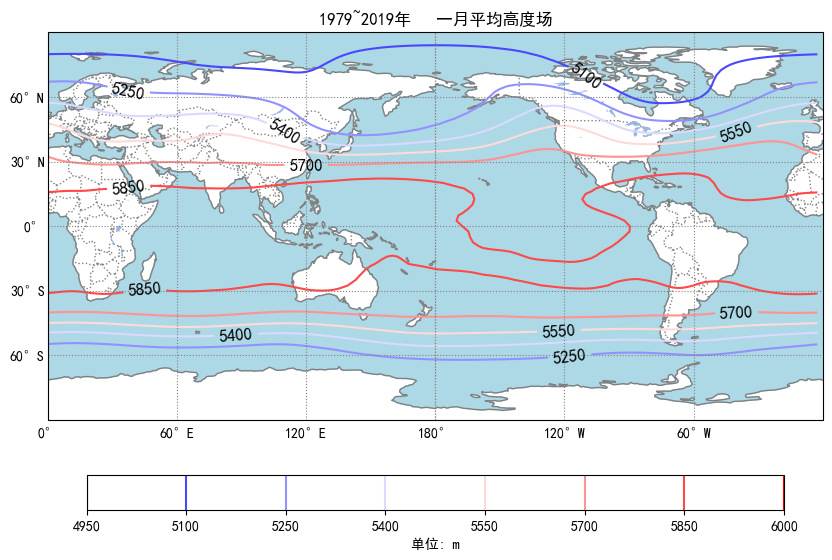

In [6]:
import cartopy.feature as cfeature
import matplotlib.font_manager as fm                              
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
# 基础数据
lon = Jan_Hgt_Mean["lon"]
lat = Jan_Hgt_Mean["lat"]

# 绘图
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude = 180))
ax.set_global()
# ax.stock_img()          # 该句设置以后,   add_feature 就没啥用了
ax.coastlines(color="gray")
ax.add_feature(cfeature.LAND, color = 'white')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.BORDERS, linestyle=":", color="gray")
ax.add_feature(cfeature.LAKES)

grid_basic = ax.gridlines(draw_labels=True, linestyle=':', color = 'gray')
grid_basic.top_labels = False
grid_basic.right_labels= False

## 平均图
Avg_Img = ax.contour(lon,lat, Jan_Hgt_Mean ,
                 cmap= "bwr",
                 transform = ccrs.PlateCarree()
                )

ax.set_title("1979~2019年   一月平均高度场")
Avg_Img.clabel( inline=True , fontsize=12 , colors = "black" )
Avg_Img_cbar = fig.colorbar(Avg_Img, orientation="horizontal" , pad=0.09 , shrink=0.9 , label="单位: m")
fig.savefig("平均图")


Text(100, 56, 'D')

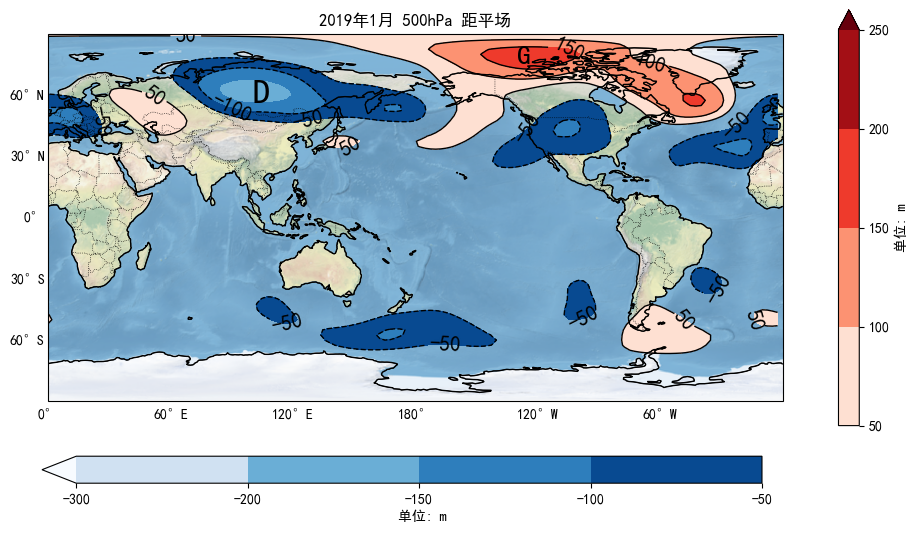

In [5]:
# 获取数据
specific_yr_hgt = hgt_level_time_slice.sel(time="1979-01-01T00:00:00.000000000").mean(dim=["level"])
anomaly_2019 = specific_yr_hgt - Jan_Hgt_Mean

fig = plt.figure(figsize=(12,9))
ax_2019_anomaly = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude = 180))
ax_2019_anomaly.stock_img()
ax_2019_anomaly.coastlines()
# ax_2019_anomaly.set_global()
ax_2019_anomaly.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)
ax_2019_anomaly.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax_2019Img = ax_2019_anomaly.contour(lon, lat, anomaly_2019 ,
                                     colors = "black",
                                     levels =[-100,-50,50,100,150,200],
                                    transform = ccrs.PlateCarree() , 
                                    linewidths = 1)
ax_2019_grid = ax_2019_anomaly.gridlines(draw_labels=True, linestyle=':', color='gray')
ax_2019_grid.top_labels=False
ax_2019_grid.right_labels=False
ax_2019_grid.xlines = False
ax_2019_grid.ylines = False
ax_2019Img_contourf_min = ax_2019_anomaly.contourf(lon, lat, anomaly_2019 ,
                                     levels=[-300,-200,-150,-100,-50],
                                     cmap="Blues" ,
                                    transform = ccrs.PlateCarree() ,
                                                   extend = "min"
                                            )
# 设置颜色条 colorbar 
ax3=fig.add_axes([0.12,0.2,0.6,0.03])
fig.colorbar(ax_2019Img_contourf_min,cax=ax3,orientation='horizontal', label=" 单位: m")


ax_2019Img_contourf_max = ax_2019_anomaly.contourf(lon, lat, anomaly_2019 ,
                                     levels=[50,100,150,200,250],    # 从100 到 300 延伸
                                    cmap="Reds", 
                                    transform = ccrs.PlateCarree() , 
                                                   extend="max"
                                            ) 
max_2019_cbar = fig.colorbar(ax_2019Img_contourf_max, shrink=0.6, pad=0.06 , label="单位: m")

ax_2019_anomaly.clabel(ax_2019Img,fontsize=15)
ax_2019_anomaly.set_title("2019年1月 500hPa 距平场")


text_lat  = anomaly_2019.where(anomaly_2019 > 100, drop = True).indexes
text_lon = anomaly_2019.where(anomaly_2019 > 100, drop = True).indexes
ax_2019_anomaly.text(-130,75,"G", fontsize=20, transform = ccrs.PlateCarree(), )
ax_2019_anomaly.text(100,56,"D", fontsize=25, transform = ccrs.PlateCarree()) 

In [8]:
# 计算纬偏值
hgt_2019_1_lat_avg = hgt_level_time_slice.sel(time="1979-01-01T00:00:00.000000000").mean(dim=["lat","level"])
lat_hgt_2019_1 =  hgt_level_time_slice.sel(time="1979-01-01T00:00:00.000000000").mean(dim=["level"])
devation_lat_arry = np.zeros((73,144))
for i  in range(lat_hgt_2019_1.shape[1]): 
    i_devation = lat_devation = lat_hgt_2019_1[:,i] - hgt_2019_1_lat_avg[i]
    devation_lat_arry[:,i] = i_devation

Text(112, -77, 'D')

D:\myAnaconda_base\envs\geocat\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
D:\myAnaconda_base\envs\geocat\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
D:\myAnaconda_base\envs\geocat\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


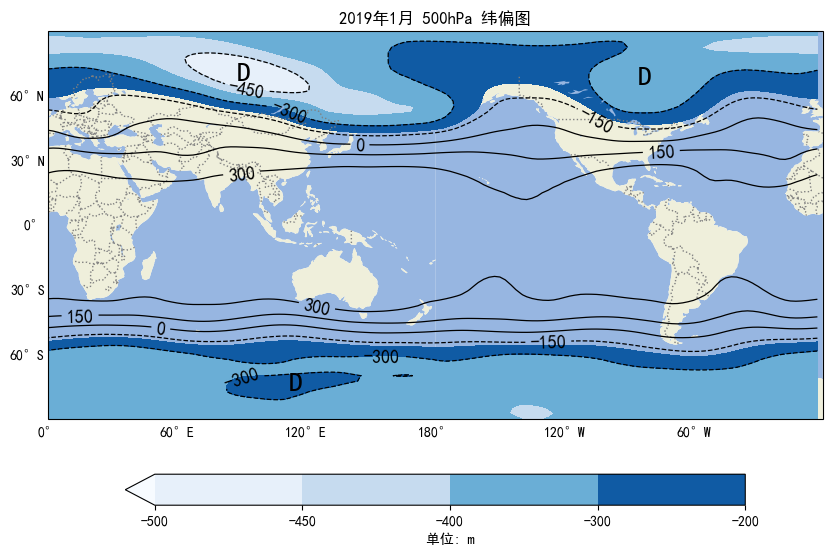

In [10]:
# 纬偏图

fig = plt.figure(figsize=(10,8))
lat_devation_subplot = fig.add_subplot(projection = ccrs.PlateCarree(central_longitude=180))
lat_devation_subplot.set_global()

lat_devation_subplot.add_feature(cfeature.OCEAN)
lat_devation_subplot.add_feature(cfeature.LAKES)
lat_devation_subplot.add_feature(cfeature.LAND)
lat_devation_subplot.add_feature(cfeature.BORDERS,linestyle=':', color= 'gray')

devation_grid = lat_devation_subplot.gridlines(draw_labels = True)
devation_grid.top_labels = False
devation_grid.right_labels= False
devation_grid.xlines = False
devation_grid.ylines = False

lat_dev_Img = lat_devation_subplot.contour(lon, lat, devation_lat_arry,
                               colors = "black",
                               linewidths = 0.9,
                              transform = ccrs.PlateCarree())

lat_dev_Img_contouf = lat_devation_subplot.contourf(lon, lat, devation_lat_arry,
                                levels = [-500,-450, -400,-300,-200],              
                                cmap = "Blues",
                                extend="min",
                              transform = ccrs.PlateCarree())
lat_dev_cbar = fig.colorbar(lat_dev_Img_contouf, orientation="horizontal", shrink=0.8 , pad=0.09, label="单位: m")

lat_dev_Img.clabel(inline=True, fontsize = 13)
lat_devation_subplot.set_title("2019年1月 500hPa 纬偏图")
lat_devation_subplot.text(88,67,"D", transform=ccrs.PlateCarree() , fontsize=20) 
lat_devation_subplot.text(-86,65,"D", transform=ccrs.PlateCarree() , fontsize=20) 
lat_devation_subplot.text(112,-77,"D", transform=ccrs.PlateCarree() , fontsize=20) 

In [ ]:
# 确保颜色条位于底部并紧贴图像
bottom_cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])  # 调整这里的坐标以适应你的需求
min_2019_cbar = fig.colorbar(ax_2019Img_contourf_min, cax=bottom_cbar_ax, orientation="horizontal", shrink=0.8, pad=0.07)
